In [1]:
import pandas as pd 
import numpy as np
from kmodes.kprototypes import KPrototypes





In [8]:
url=r"C:\Users\home\Downloads\Indian_automoble_buying_behavour_study_1.0.csv"
df=pd.read_csv(url)
print(df.head())

   Age Profession Marrital Status      Education  No of Dependents  \
0   27   Salaried          Single  Post Graduate                 0   
1   35   Salaried         Married  Post Graduate                 2   
2   45   Business         Married       Graduate                 4   
3   41   Business         Married  Post Graduate                 3   
4   31   Salaried         Married  Post Graduate                 2   

  Personal loan House Loan Wife Working   Salary  Wife Salary  Total Salary  \
0           Yes         No           No   800000            0        800000   
1           Yes        Yes          Yes  1400000       600000       2000000   
2           Yes        Yes           No  1800000            0       1800000   
3            No         No          Yes  1600000       600000       2200000   
4           Yes         No          Yes  1800000       800000       2600000   

     Make    Price  
0     i20   800000  
1    Ciaz  1000000  
2  Duster  1200000  
3    City  1200000  

In [9]:
print(df)

    Age Profession Marrital Status      Education  No of Dependents  \
0    27   Salaried          Single  Post Graduate                 0   
1    35   Salaried         Married  Post Graduate                 2   
2    45   Business         Married       Graduate                 4   
3    41   Business         Married  Post Graduate                 3   
4    31   Salaried         Married  Post Graduate                 2   
..  ...        ...             ...            ...               ...   
94   27   Business          Single       Graduate                 0   
95   50   Salaried         Married  Post Graduate                 3   
96   51   Business         Married       Graduate                 2   
97   51   Salaried         Married  Post Graduate                 2   
98   51   Salaried         Married  Post Graduate                 2   

   Personal loan House Loan Wife Working   Salary  Wife Salary  Total Salary  \
0            Yes         No           No   800000            0     

In [10]:
EV_df=df.drop(['Marrital Status','Education','Wife Working'],axis=1)
print(EV_df)

    Age Profession  No of Dependents Personal loan House Loan   Salary  \
0    27   Salaried                 0           Yes         No   800000   
1    35   Salaried                 2           Yes        Yes  1400000   
2    45   Business                 4           Yes        Yes  1800000   
3    41   Business                 3            No         No  1600000   
4    31   Salaried                 2           Yes         No  1800000   
..  ...        ...               ...           ...        ...      ...   
94   27   Business                 0            No         No  2400000   
95   50   Salaried                 3            No         No  3800000   
96   51   Business                 2           Yes        Yes  2200000   
97   51   Salaried                 2            No         No  2700000   
98   51   Salaried                 2           Yes        Yes  2200000   

    Wife Salary  Total Salary    Make    Price  
0             0        800000     i20   800000  
1        6000

In [11]:
EV_df=EV_df.drop(["Salary","Wife Salary"],axis=1)
print(EV_df)

    Age Profession  No of Dependents Personal loan House Loan  Total Salary  \
0    27   Salaried                 0           Yes         No        800000   
1    35   Salaried                 2           Yes        Yes       2000000   
2    45   Business                 4           Yes        Yes       1800000   
3    41   Business                 3            No         No       2200000   
4    31   Salaried                 2           Yes         No       2600000   
..  ...        ...               ...           ...        ...           ...   
94   27   Business                 0            No         No       2400000   
95   50   Salaried                 3            No         No       5100000   
96   51   Business                 2           Yes        Yes       2200000   
97   51   Salaried                 2            No         No       4000000   
98   51   Salaried                 2           Yes        Yes       2200000   

      Make    Price  
0      i20   800000  
1     C

In [12]:
EV_array=EV_df.values
print(EV_array)

[[27 'Salaried' 0 'Yes' 'No' 800000 'i20' 800000]
 [35 'Salaried' 2 'Yes' 'Yes' 2000000 'Ciaz' 1000000]
 [45 'Business' 4 'Yes' 'Yes' 1800000 'Duster' 1200000]
 [41 'Business' 3 'No' 'No' 2200000 'City' 1200000]
 [31 'Salaried' 2 'Yes' 'No' 2600000 'SUV' 1600000]
 [28 'Salaried' 3 'Yes' 'Yes' 900000 'Baleno' 700000]
 [31 'Salaried' 4 'No' 'No' 1800000 'City' 1200000]
 [33 'Business' 4 'No' 'No' 1400000 'Baleno' 700000]
 [34 'Business' 4 'No' 'No' 2000000 'Verna' 1100000]
 [34 'Salaried' 3 'Yes' 'Yes' 1900000 'i20' 800000]
 [35 'Salaried' 4 'No' 'No' 2000000 'SUV' 1600000]
 [35 'Salaried' 4 'Yes' 'Yes' 1400000 'Baleno' 700000]
 [29 'Salaried' 0 'No' 'No' 1700000 'Verna' 110000]
 [30 'Business' 2 'Yes' 'No' 1400000 'i20' 800000]
 [31 'Business' 3 'Yes' 'Yes' 1300000 'Baleno' 700000]
 [49 'Salaried' 4 'No' 'No' 4500000 'Luxuray' 3000000]
 [26 'Salaried' 0 'No' 'No' 800000 'i20' 800000]
 [27 'Salaried' 0 'Yes' 'No' 800000 'Baleno' 700000]
 [29 'Salaried' 2 'No' 'No' 900000 'City' 1200000]


In [13]:
EV_array[:, 0] = EV_array[:,0].astype(float)
EV_array[:, 2] = EV_array[:,2].astype(float)
EV_array[:, 5] = EV_array[:,5].astype(float)
EV_array[:, 7] = EV_array[:,7].astype(float)
print(EV_array)

[[27.0 'Salaried' 0.0 'Yes' 'No' 800000.0 'i20' 800000.0]
 [35.0 'Salaried' 2.0 'Yes' 'Yes' 2000000.0 'Ciaz' 1000000.0]
 [45.0 'Business' 4.0 'Yes' 'Yes' 1800000.0 'Duster' 1200000.0]
 [41.0 'Business' 3.0 'No' 'No' 2200000.0 'City' 1200000.0]
 [31.0 'Salaried' 2.0 'Yes' 'No' 2600000.0 'SUV' 1600000.0]
 [28.0 'Salaried' 3.0 'Yes' 'Yes' 900000.0 'Baleno' 700000.0]
 [31.0 'Salaried' 4.0 'No' 'No' 1800000.0 'City' 1200000.0]
 [33.0 'Business' 4.0 'No' 'No' 1400000.0 'Baleno' 700000.0]
 [34.0 'Business' 4.0 'No' 'No' 2000000.0 'Verna' 1100000.0]
 [34.0 'Salaried' 3.0 'Yes' 'Yes' 1900000.0 'i20' 800000.0]
 [35.0 'Salaried' 4.0 'No' 'No' 2000000.0 'SUV' 1600000.0]
 [35.0 'Salaried' 4.0 'Yes' 'Yes' 1400000.0 'Baleno' 700000.0]
 [29.0 'Salaried' 0.0 'No' 'No' 1700000.0 'Verna' 110000.0]
 [30.0 'Business' 2.0 'Yes' 'No' 1400000.0 'i20' 800000.0]
 [31.0 'Business' 3.0 'Yes' 'Yes' 1300000.0 'Baleno' 700000.0]
 [49.0 'Salaried' 4.0 'No' 'No' 4500000.0 'Luxuray' 3000000.0]
 [26.0 'Salaried' 0.0 'No

In [14]:

 kproto = KPrototypes(n_clusters=4,verbose=2, max_iter=20)
clusters = kproto.fit_predict(EV_array, categorical=[1,3,4,6])
print(kproto)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 4, ncost: 18746194054862.08
Run: 1, iteration: 2/20, moves: 2, ncost: 18709348501228.43
Run: 1, iteration: 3/20, moves: 1, ncost: 18691692301804.254
Run: 1, iteration: 4/20, moves: 0, ncost: 18691692301804.254
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 38, ncost: 30267737248337.582
Run: 2, iteration: 2/20, moves: 20, ncost: 18610054252299.047
Run: 2, iteration: 3/20, moves: 3, ncost: 18491876136326.04
Run: 2, iteration: 4/20, moves: 0, ncost: 18491876136326.04
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 20, ncost: 20611274224643.164
Run: 3, iteration: 2/20, moves: 9, ncost: 19531769661683.258
Run: 3, iteration: 3/20, moves: 10, ncost: 18796600258038.55
Run: 3, iteration: 4/20, moves: 3, ncost: 18678422142065.54
Run: 3, iteration: 5/20, moves

In [15]:
print(kproto.cluster_centroids_)

[['36.94117647058823' '2.3529411764705883' '1970588.2352941176'
  '1135294.1176470588' 'Salaried' 'No' 'No' 'Ciaz']
 ['31.678571428571427' '1.6785714285714286' '1207142.857142857'
  '782500.0' 'Salaried' 'No' 'No' 'Baleno']
 ['37.22727272727273' '2.3181818181818183' '2745454.5454545454'
  '1436363.6363636365' 'Salaried' 'No' 'No' 'SUV']
 ['42.2' '2.533333333333333' '4240000.0' '1740000.0' 'Salaried' 'No' 'No'
  'Creata']]


In [16]:
cluster_dic=[]
for c in clusters:
    cluster_dic.append(c)
print(cluster_dic)

[1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 1, 2, 0, 1, 3, 1, 2, 1, 2, 0, 3, 2, 3, 3, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 3, 0, 3, 0, 2, 2, 1, 2, 0, 3, 0, 2, 2, 3, 0, 3, 0, 2, 2, 0, 1, 0, 3, 0, 1, 3, 2, 1, 2, 3, 0, 3, 0]


In [17]:
EV_df['cluster']=cluster_dic
print(EV_df)


    Age Profession  No of Dependents Personal loan House Loan  Total Salary  \
0    27   Salaried                 0           Yes         No        800000   
1    35   Salaried                 2           Yes        Yes       2000000   
2    45   Business                 4           Yes        Yes       1800000   
3    41   Business                 3            No         No       2200000   
4    31   Salaried                 2           Yes         No       2600000   
..  ...        ...               ...           ...        ...           ...   
94   27   Business                 0            No         No       2400000   
95   50   Salaried                 3            No         No       5100000   
96   51   Business                 2           Yes        Yes       2200000   
97   51   Salaried                 2            No         No       4000000   
98   51   Salaried                 2           Yes        Yes       2200000   

      Make    Price  cluster  
0      i20   800000 

In [18]:
print(EV_df[EV_df['cluster']==1].head(10))

    Age Profession  No of Dependents Personal loan House Loan  Total Salary  \
0    27   Salaried                 0           Yes         No        800000   
5    28   Salaried                 3           Yes        Yes        900000   
7    33   Business                 4            No         No       1400000   
11   35   Salaried                 4           Yes        Yes       1400000   
12   29   Salaried                 0            No         No       1700000   
13   30   Business                 2           Yes         No       1400000   
14   31   Business                 3           Yes        Yes       1300000   
16   26   Salaried                 0            No         No        800000   
17   27   Salaried                 0           Yes         No        800000   
18   29   Salaried                 2            No         No        900000   

      Make    Price  cluster  
0      i20   800000        1  
5   Baleno   700000        1  
7   Baleno   700000        1  
11  Ba

In [19]:
print(EV_df[EV_df['cluster']==2].head(10))

    Age Profession  No of Dependents Personal loan House Loan  Total Salary  \
4    31   Salaried                 2           Yes         No       2600000   
20   37   Salaried                 3            No        Yes       2500000   
22   36   Business                 3            No         No       2400000   
25   35   Salaried                 2            No         No       2900000   
28   36   Salaried                 3           Yes        Yes       2600000   
29   36   Salaried                 2            No         No       2700000   
32   41   Salaried                 4            No        Yes       3000000   
42   32   Salaried                 0            No         No       2400000   
47   36   Business                 2            No        Yes       2600000   
49   36   Salaried                 3           Yes         No       3100000   

      Make    Price  cluster  
4      SUV  1600000        2  
20    City  1200000        2  
22     SUV  1600000        2  
25    

In [20]:
print(EV_df[EV_df['cluster']==3].head(10))

    Age Profession  No of Dependents Personal loan House Loan  Total Salary  \
15   49   Salaried                 4            No         No       4500000   
35   42   Salaried                 3            No         No       3700000   
45   34   Salaried                 3            No        Yes       3600000   
51   49   Salaried                 3            No         No       4300000   
53   44   Business                 3            No         No       3800000   
54   41   Salaried                 2            No         No       4700000   
66   39   Business                 2           Yes        Yes       3600000   
68   39   Salaried                 2           Yes        Yes       4000000   
75   36   Salaried                 2            No         No       3600000   
79   45   Salaried                 2            No        Yes       4500000   

       Make    Price  cluster  
15  Luxuray  3000000        3  
35      SUV  1600000        3  
45   Creata  1500000        3  
51

Text(0.5, 0, 'Total Salary')
Text(0, 0.5, 'Car Price')


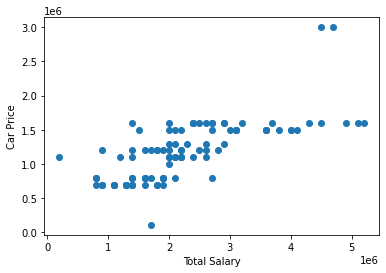

None


In [36]:
import matplotlib.pyplot as plt
print(plt.scatter(EV_df['Total Salary'],EV_df["Price"]))
print(plt.xlabel("Total Salary"))
print(plt.ylabel("Car Price"))
print(plt.show())



Text(0.5, 0, 'Total Salary')
Text(0, 0.5, 'Car Price')


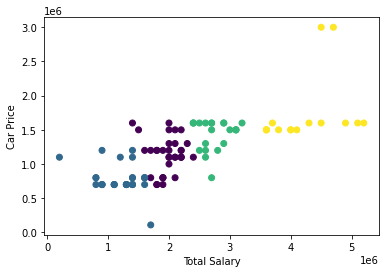

None


In [38]:
print(plt.scatter(EV_df['Total Salary'],EV_df["Price"],c=EV_df["cluster"]))
print(plt.xlabel("Total Salary"))
print(plt.ylabel("Car Price"))
print(plt.show())